# 2: Preprocesamiento de los datos (preprocessing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

## Lectura de la data

In [2]:
sensors = ["sensorMeasure" + str(i) for i in range(1, 22)]

# Leyendo la data de entrenamiento.
df_train1 = pd.read_csv('df_train_fd001.csv')
df_train3 = pd.read_csv('df_train_fd003.csv')
df_train2 = pd.read_csv('df_train_fd002.csv')
df_train4 = pd.read_csv('df_train_fd004.csv')

# Leyendo la data de prueba.
df_test1 = pd.read_csv('df_test_fd001.csv')
df_test3 = pd.read_csv('df_test_fd003.csv')
df_test2 = pd.read_csv('df_test_fd002.csv')
df_test4 = pd.read_csv('df_test_fd004.csv')

# Leyendo archivo RUL
RUL_fd001 = pd.read_csv('CMAPSS_Data/RUL_FD001.txt', sep=' ', header=None)
RUL_fd003 = pd.read_csv('CMAPSS_Data/RUL_FD003.txt', sep=' ', header=None)
RUL_fd002 = pd.read_csv('CMAPSS_Data/RUL_FD002.txt', sep=' ', header=None)
RUL_fd004 = pd.read_csv('CMAPSS_Data/RUL_FD004.txt', sep=' ', header=None)

In [3]:
df_train1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm
0,0,1.0,1.0,0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,191.0,0.005208
1,1,1.0,2.0,1,518.67,642.15,1591.82,1403.14,14.62,21.61,...,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236,190.0,0.010417
2,2,1.0,3.0,2,518.67,642.35,1587.99,1404.20,14.62,21.61,...,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442,189.0,0.015625
3,3,1.0,4.0,3,518.67,642.35,1582.79,1401.87,14.62,21.61,...,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739,188.0,0.020833
4,4,1.0,5.0,4,518.67,642.37,1582.85,1406.22,14.62,21.61,...,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044,187.0,0.026042


In [4]:
df_test1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm
0,0,1.0,1.0,649.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,8125.55,8.4052,0.03,392.0,2388.0,100.0,38.86,23.3735,142.0,0.006993
1,1,1.0,2.0,590.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,8139.62,8.3803,0.03,393.0,2388.0,100.0,39.02,23.3916,141.0,0.013986
2,2,1.0,3.0,45.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,8130.10,8.4441,0.03,393.0,2388.0,100.0,39.08,23.4166,140.0,0.020979
3,3,1.0,4.0,397.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,8132.90,8.3917,0.03,391.0,2388.0,100.0,39.00,23.3737,139.0,0.027972
4,4,1.0,5.0,247.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,8129.54,8.4031,0.03,390.0,2388.0,100.0,38.99,23.4130,138.0,0.034965


In [5]:
RUL_fd001.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [6]:
df_train1.drop('Unnamed: 0', axis = 1, inplace=True)
df_train3.drop('Unnamed: 0', axis = 1, inplace=True)
df_train2.drop('Unnamed: 0', axis = 1, inplace=True)
df_train4.drop('Unnamed: 0', axis = 1, inplace=True)

df_test1.drop('Unnamed: 0', axis = 1, inplace=True)
df_test3.drop('Unnamed: 0', axis = 1, inplace=True)
df_test2.drop('Unnamed: 0', axis = 1, inplace=True)
df_test4.drop('Unnamed: 0', axis = 1, inplace=True)

RUL_fd001 = pd.DataFrame(RUL_fd001.loc[:,:0].values, columns=['RUL'])
RUL_fd003 = pd.DataFrame(RUL_fd003.loc[:,:0].values, columns=['RUL'])
RUL_fd002 = pd.DataFrame(RUL_fd002.loc[:,:0].values, columns=['RUL'])
RUL_fd004 = pd.DataFrame(RUL_fd004.loc[:,:0].values, columns=['RUL'])

In [7]:
df_train1.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm
0,1.0,1.0,0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,191.0,0.005208
1,1.0,2.0,1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236,190.0,0.010417
2,1.0,3.0,2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442,189.0,0.015625
3,1.0,4.0,3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739,188.0,0.020833
4,1.0,5.0,4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044,187.0,0.026042


In [8]:
df_test1.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm
0,1.0,1.0,649.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,...,8125.55,8.4052,0.03,392.0,2388.0,100.0,38.86,23.3735,142.0,0.006993
1,1.0,2.0,590.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,...,8139.62,8.3803,0.03,393.0,2388.0,100.0,39.02,23.3916,141.0,0.013986
2,1.0,3.0,45.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,...,8130.10,8.4441,0.03,393.0,2388.0,100.0,39.08,23.4166,140.0,0.020979
3,1.0,4.0,397.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,...,8132.90,8.3917,0.03,391.0,2388.0,100.0,39.00,23.3737,139.0,0.027972
4,1.0,5.0,247.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,...,8129.54,8.4031,0.03,390.0,2388.0,100.0,38.99,23.4130,138.0,0.034965


In [9]:
RUL_fd001.head()

,RUL
0,112
1,98
2,69
3,82
4,91


## Visualización

In [10]:
# Graficando los datos de prueba y entrenamiento

def time_series(data, archivo, ii):
    plt.style.use('ggplot')
    """ Gráfica las series de tiempo para el archivo e unitNumber especificados.
    
        Args:
        data (DataFrame): DataFrame con los datos a graficar.
        archivo (str): Nombre del archivo.
        ii (int): valor del unitNumber. 

    Returns:
        plots"""
        
    engine = data[(data['unitNumber'] == ii)] #Tomo sólo las filas que coincidan con el id seleccionado.

    fig, axes = plt.subplots(7, 3, figsize=(15, 10), sharex=True) #Creo 21 gráficas en el orden 7x3.
    fig.suptitle("Series de tiempo de todos los sensores para la máquina: "+str(ii)
                 + " del archivo: "+ archivo, size=20, y=1.025)
    
    for i, ax in enumerate(axes.ravel()):
        engine.plot(x='cycle', y='sensorMeasure'+str(i+1), color = 'red', ax=ax) #Gráfico todos los sensores.

### Entrenamiento

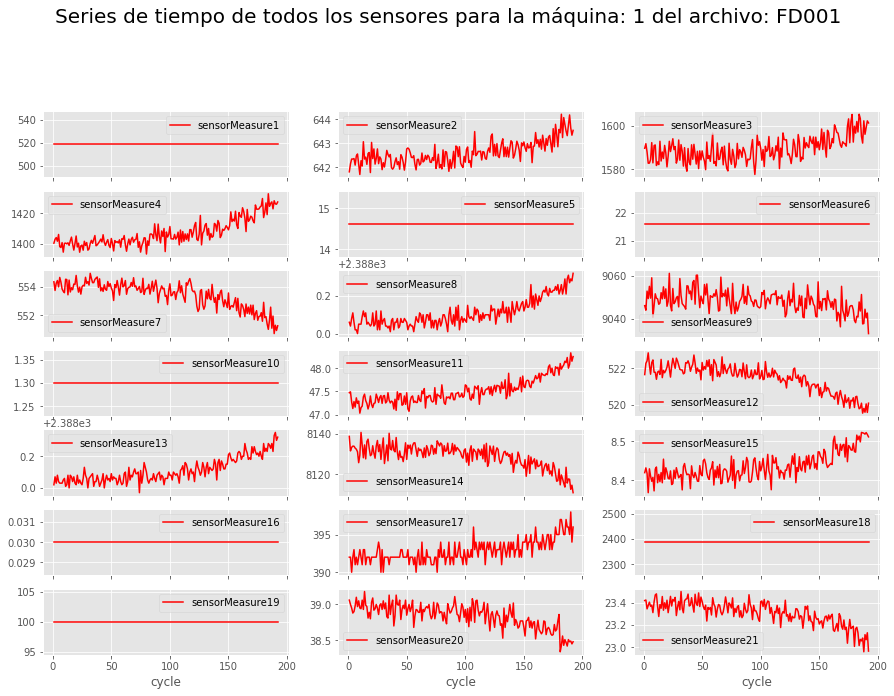

In [11]:
time_series(df_train1,'FD001', 1)

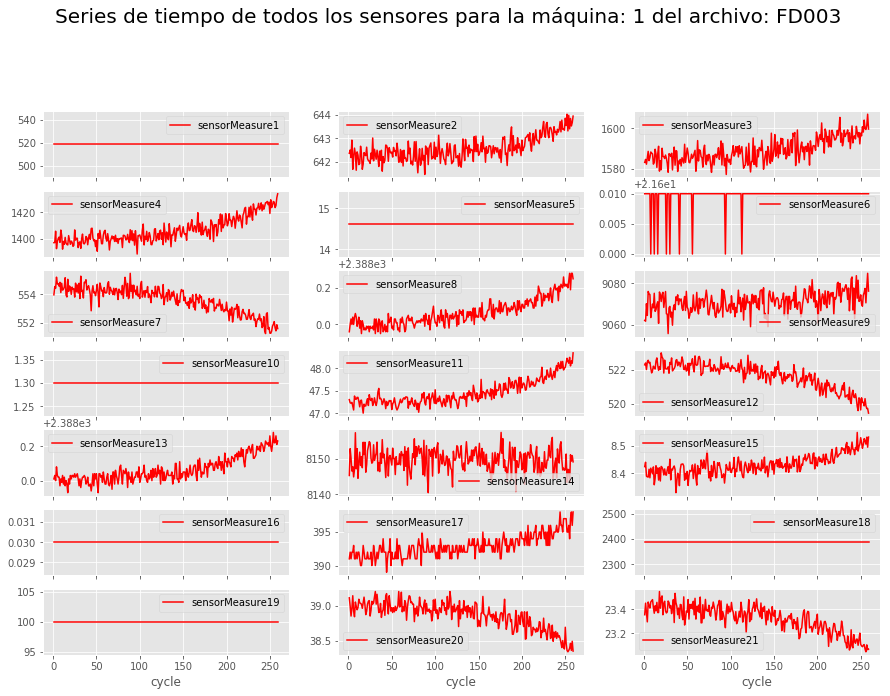

In [12]:
time_series(df_train3,'FD003', 1)

### Prueba

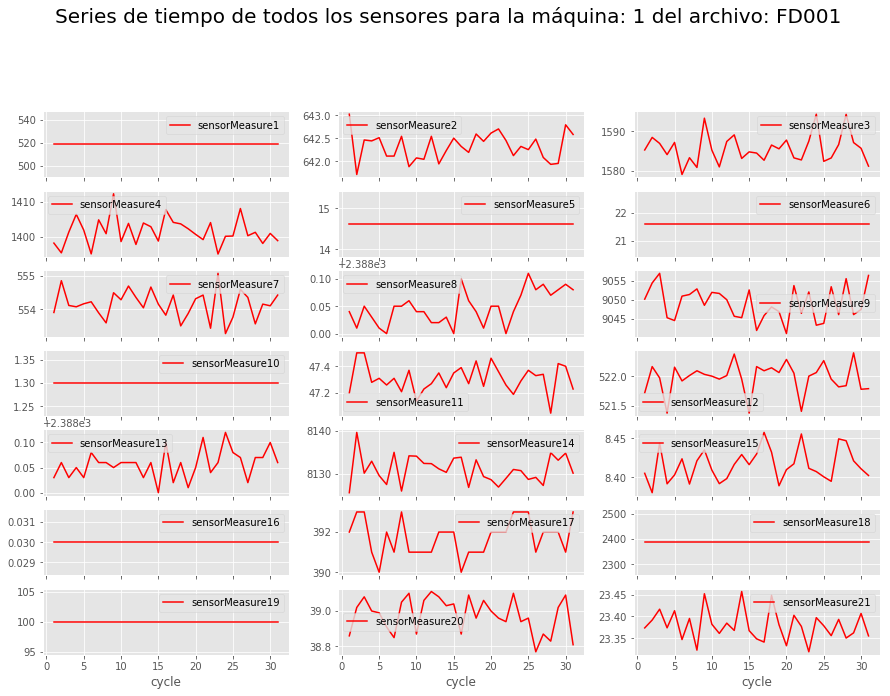

In [13]:
time_series(df_test1,'FD001', 1)

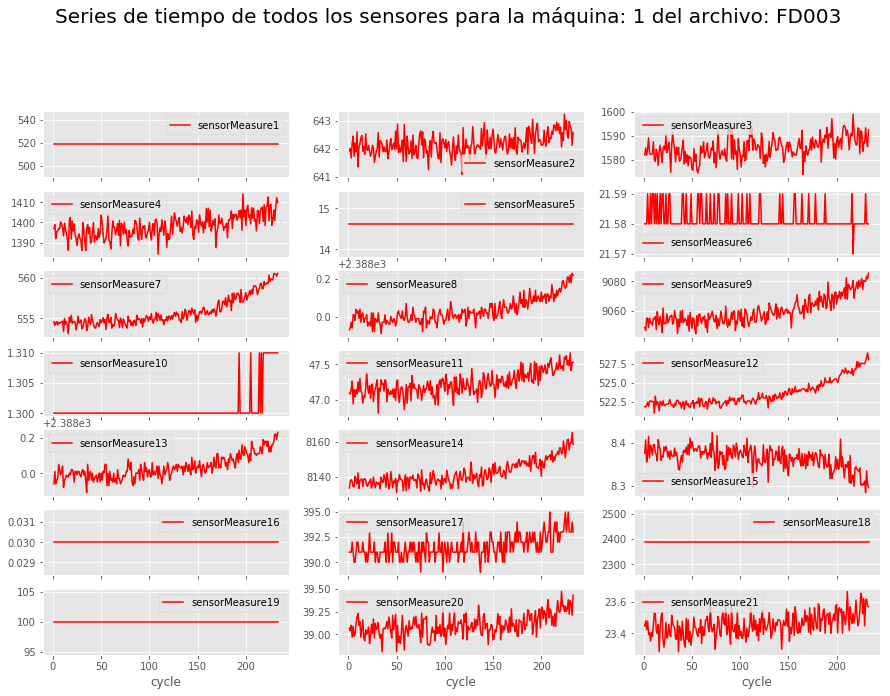

In [14]:
time_series(df_test3, 'FD003', 1)

In [15]:
def explorar(data, archivo, sensor, unit):
    
    """Se muestran 4 graficas representativas de los datos.
    
    plot1: histograma
    plot2: boxplot 
    plot3: line plot (serie de tiempo vs. cycle)
    plot4: scatter plot vs. RUL
        
    Args:
        data (DataFrame): DataFrame de entrenamiento o prueba.
        archivo (str): Archivo a graficar (FD001/002/003/004).
        sensor (str): Columna del sensor de interes.
        unit (int): número de unidades por sensor a graficar.
    Returns:
        plots
    
    """
        
    plt.style.use('_classic_test')
    a = data.copy()
    
    fig = plt.figure(figsize=(10, 8))

    sub1 = fig.add_subplot(221) 
    sub1.set_title('histograma: '+archivo +'-'+ sensor) 
    sub1.hist(a[sensor])

    sub2 = fig.add_subplot(222)
    sub2.set_title('boxplot: '+archivo +'-'+sensor)
    sub2.boxplot(a[sensor])
    
    select_engines = list(pd.unique(a.unitNumber))
    select_engines = np.random.choice(range(1,len(select_engines)+1), unit, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('Series de tiempo: ' + archivo +'-'+ sensor + ' / cycle')
    sub3.set_xlabel('cycle')
    
    for i in select_engines:
        df = a[['cycle', sensor]][a.unitNumber == i]
        sub3.plot(df['cycle'], df[sensor])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("Scatter: "+ archivo +'-'+ sensor + " / RUL")
    sub4.set_xlabel('RUL')
    sub4.scatter(a['rul'], a[sensor])

    plt.tight_layout()
    plt.show()
    sns.reset_orig()

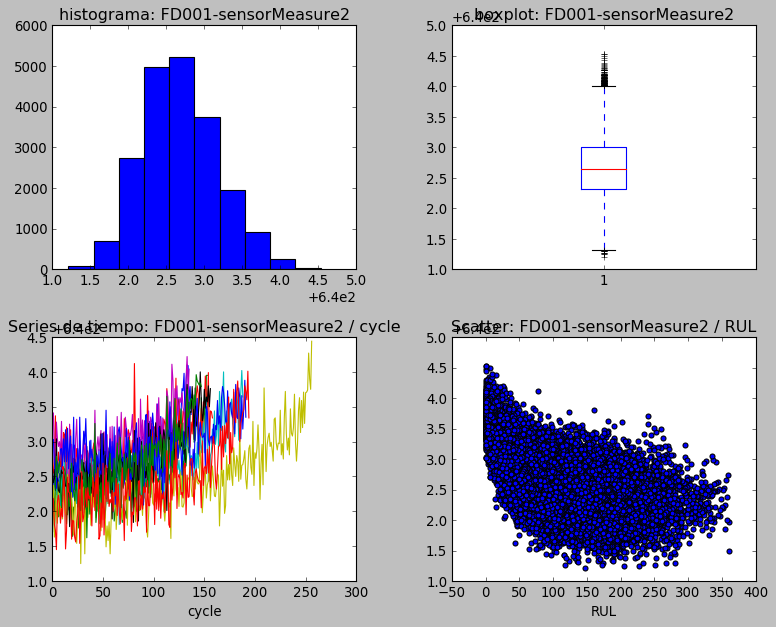

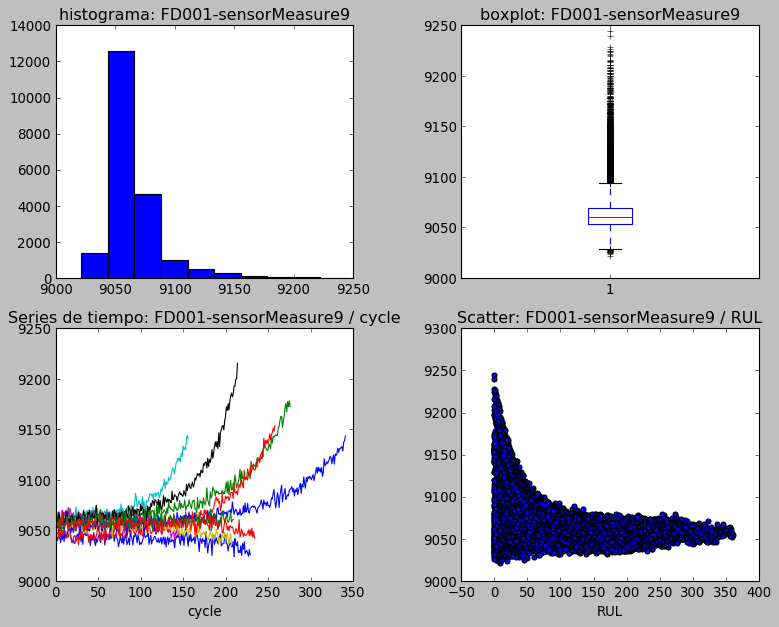

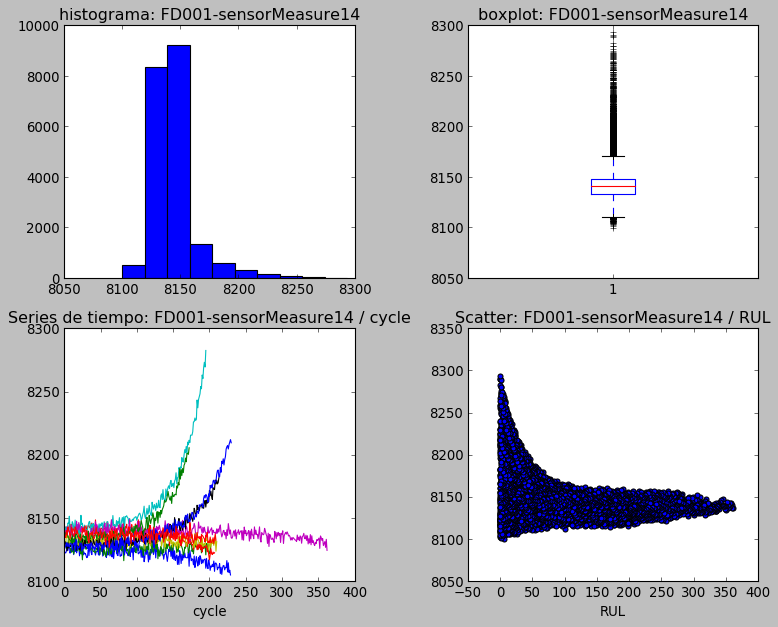

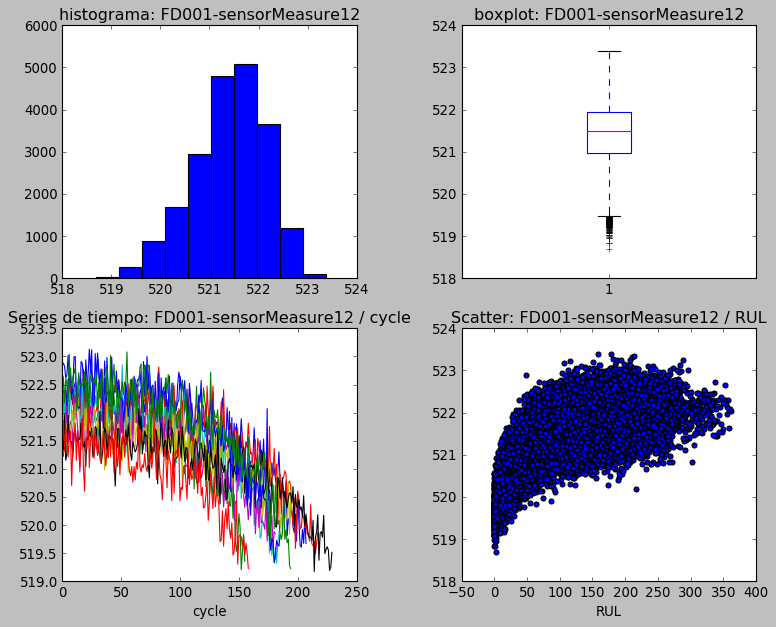

In [16]:
explorar(df_train1, 'FD001', "sensorMeasure2", 10)
explorar(df_train1, 'FD001', "sensorMeasure9", 10)
explorar(df_train1, 'FD001', "sensorMeasure14", 10)
explorar(df_train1, 'FD001', "sensorMeasure12", 10)

## Identificación de valores átipicos (outliers)

In [17]:
from sklearn.neighbors import LocalOutlierFactor #Importo el paquete

def outliers_lof(datos, archivo, maquina, sensor):
    
    """
    Esta función devuelve las posiciones de los outliers para el archivo y máquina especificada.
    input: Datos: Son los datos del dataset
           archivo: Corresponde archivo a evaluar (FD001/002/003/004)
           maquina: Corresponde al unitNumber de la máquina
           sensor: Sensor a tratar
           
    output: posicion: posiciones de los outliers en el dataset.
    
    """
        
    a = datos[(datos.unitNumber == maquina)]
    a.drop(['unitNumber', 'opset_id', 'rul', 'rul_norm'], axis = 1, inplace = True)
    
    b = a[sensor].values.reshape(-1,1)     #Convierto el vector columna en un vector fila.
    clf = LocalOutlierFactor(n_neighbors=15)
    clf.fit(b)
    X_scores = clf.negative_outlier_factor_
    
    plt.figure(figsize=(10,5))
    
    #Dibujo los puntos originales del sensor
    plt.title("Local Outlier Factor (LOF) del archivo: " +archivo+' máquina '+ str(maquina))
    plt.scatter(a['cycle'], a[sensor], color='k', s=3.0, label='Data points')

    # Se dibujo un circulo que sea proporcional al score del outlier.
    radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
    plt.scatter(a['cycle'], a[sensor], s=1000 * radius, edgecolors='r', facecolors='none', label='Outlier scores')
    
    [plt.scatter(a.cycle[a.index[i]], a[sensor][a.index[i]], s=30, c = 'b') 
    for i in list(range(len(a.index))) if (X_scores[i]<= -1.3) or (X_scores[i]>= -0.8)]

    plt.axis('tight')

    legend = plt.legend(loc='upper center')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.show()
    
    # Valores que posiblemente sean outliers
    print('Posibles valores outliers del sensor\n')
    [print(a.index[i], a[sensor][a.index[i]]) for i in list(range(len(a.index))) 
     if (X_scores[i]<= -1.3) or (X_scores[i]>= -0.8)]
    
    posicion = [a.index[i] for i in list(range(len(a.index))) 
                if (X_scores[i]<= -1.3) or (X_scores[i]>= -0.8)]
        
    print('\n')
    
    # Score de los posibles outliers
    print('Score de los posibles outliers \n')
    score_outlier = [print(i) for i in X_scores if (i <= -1.3) or (i >= -0.8)]
    
    return posicion

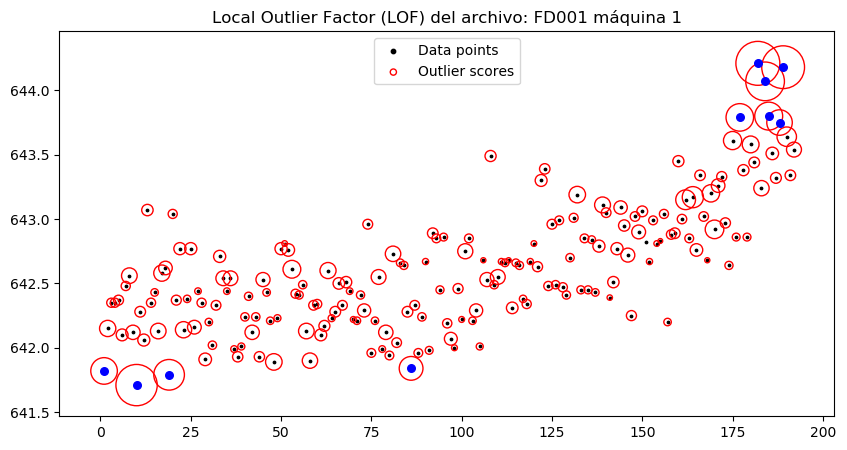

Posibles valores outliers del sensor

0 641.82
9 641.71
18 641.79
85 641.84
176 643.79
181 644.21
183 644.07
184 643.8
187 643.75
188 644.18


Score de los posibles outliers 

-1.4721748739122684
-2.224796063571479
-1.6468905072264834
-1.3646575611040503
-1.510397974886272
-2.3937538023821463
-2.0668622390998586
-1.5278654630006059
-1.4296733972888034
-2.318893139034839


In [18]:
posicion = outliers_lof(df_train1, 'FD001', 1, 'sensorMeasure2')

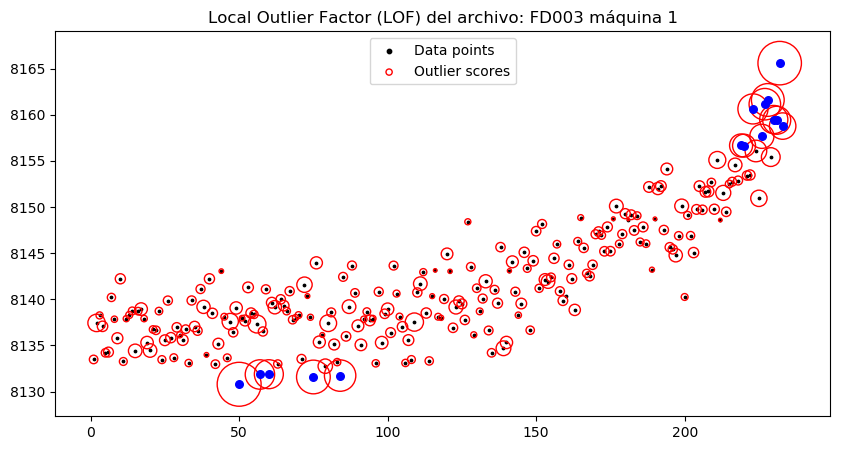

Posibles valores outliers del sensor

49 8130.79
56 8131.85
59 8131.88
74 8131.58
83 8131.73
218 8156.67
219 8156.65
222 8160.63
225 8157.66
226 8161.14
227 8161.6
229 8159.48
230 8159.4
231 8165.59
232 8158.77


Score de los posibles outliers 

-2.3786778874830388
-1.5894002639759073
-1.5692770384475752
-1.789887214612045
-1.6780915172317425
-1.3400158936960367
-1.3372639878068446
-1.6194724510828518
-1.3788005922488689
-1.6844920735744349
-1.743137223272705
-1.5360547226111323
-1.5281125948150633
-2.3498049053997856
-1.4655683384210472


In [19]:
posicion = outliers_lof(df_test3, 'FD003', 1, 'sensorMeasure14')

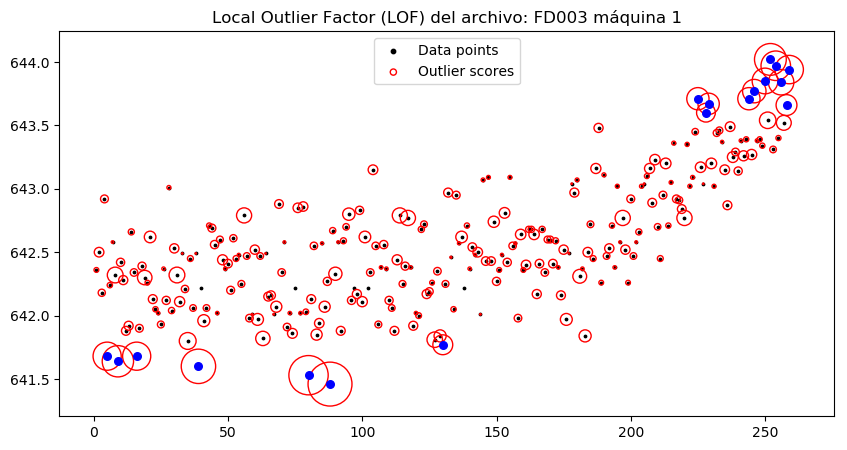

Posibles valores outliers del sensor

4 641.68
8 641.64
15 641.68
38 641.6
79 641.53
87 641.46
129 641.77
224 643.71
227 643.6
228 643.67
243 643.71
245 643.77
249 643.85
251 644.02
253 643.97
255 643.84
257 643.66
258 643.94


Score de los posibles outliers 

-1.7924240523384538
-1.9911686496319831
-1.7924240523384538
-2.2023834180739215
-2.5825700012700277
-2.986895415144457
-1.3749528326278895
-1.4799670628093646
-1.3300101335296266
-1.4367555888708712
-1.4799670628093646
-1.5378337001676947
-1.654760852371177
-2.0217821912319027
-1.8756232509777344
-1.6385209701207137
-1.4163840136008814
-1.8074157455257895


In [20]:
posicion = outliers_lof(df_train3, 'FD003', 1, 'sensorMeasure2')

# 2.1: Limpieza de datos

## 2.1.1: Remoción de valores átipicos.

In [21]:
df_train1_clean = df_train1.copy()
df_train3_clean = df_train3.copy()
df_train2_clean = df_train2.copy()
df_train4_clean = df_train4.copy()

df_test1_clean = df_test1.copy()
df_test3_clean = df_test3.copy()
df_test2_clean = df_test2.copy()
df_test4_clean = df_test4.copy()

In [22]:
def outliers_lof1(datos, maquina, sensor):
    """
    Esta función devuelve las posiciones de los outliers para el archivo y máquina especificada.
    input: Datos: Son los datos del dataset
           maquina: Corresponde al unitNumber de la máquina
           sensor: Sensor a tratar
           
    output: posicion: posiciones de los outliers en el dataset.
    
    """    
    a = datos[(datos.unitNumber == maquina)]
    a = a.drop(['unitNumber', 'opset_id', 'rul', 'rul_norm'], axis = 1)
    
    b = a[sensor].values.reshape(-1,1)     #Convierto el vector columna en un vector fila.
    clf = LocalOutlierFactor(n_neighbors=15)
    clf.fit(b)
    X_scores = clf.negative_outlier_factor_

    posicion = [a.index[i] for i in list(range(len(a.index))) 
                if (X_scores[i]<= -1.3) or (X_scores[i]>= -0.8)]

    return posicion

In [23]:
def remocion(datos, maquina, sensor):
    """
    Esta función remueve los outliers para el archivo y máquina especificada.
    input: Datos: Son los datos del dataset
           maquina: Corresponde al unitNumber de la máquina
           sensor: Sensor a tratar
           
    output: datos: dataset sin outliers.
    
    """     
    posicion = outliers_lof1(datos, maquina, sensor)
    
    inicio = datos[(datos.unitNumber == maquina)].index[0]
    final = datos[(datos.unitNumber == maquina)].index[-1]
    
    if posicion != []:
        if inicio in posicion:
            del posicion[0]

        if final in posicion:
            del posicion[-1]

        for i in posicion:
            if i < (posicion[-1]-30):
                datos.loc[i, sensor] = (datos.loc[i-1, sensor] + datos.loc[i+1, sensor])/2 
            
    return datos

In [24]:
def sin_outliers(datos, maquinas):
    """
    Esta función recorre las distintas máquinas del dataset para retirarle los outliers
    input: Datos: Son los datos del dataset
           archivo: Corresponde archivo a evaluar (FD001/002/003/004)
           maquinas: Corresponde a TODAS las maquinas del dataset seleccionado (FD001: 100
                                                                                FD002: 260
                                                                                FD003: 100
                                                                                FD004: 249)         
    output: datos: dataset sin outliers.
    
    """      
    for j in list(range(1, maquinas+1)):
        for i in list(range(1,22)):
            datos = remocion(datos, j, 'sensorMeasure'+str(i))
            
    return  datos

In [25]:
#Limpia el archivo FD001
df_train1_clean = sin_outliers(df_train1_clean, 100)

#Limpia el archivo FD003
df_train3_clean = sin_outliers(df_train3_clean, 100)

#Limpia el archivo FD002
df_train2_clean = sin_outliers(df_train2_clean, 260)

#Limpia el archivo FD004
df_train4_clean = sin_outliers(df_train4_clean, 249)

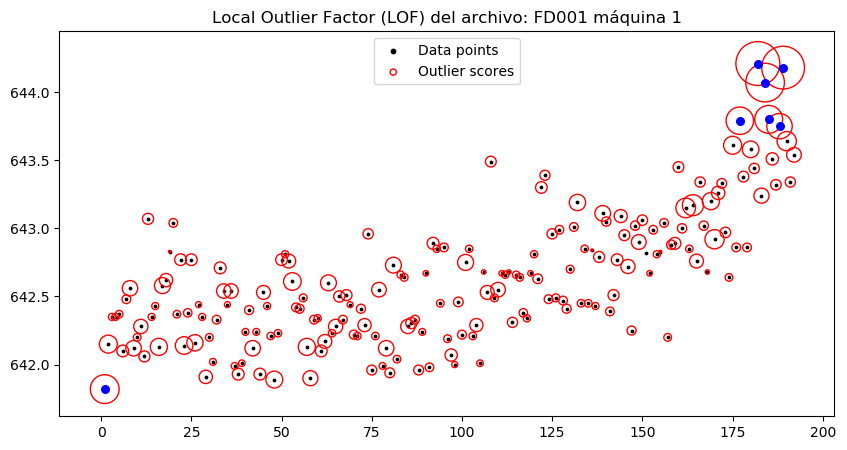

Posibles valores outliers del sensor

0 641.82
176 643.79
181 644.21
183 644.07
184 643.8
187 643.75
188 644.18


Score de los posibles outliers 

-1.5688572362880113
-1.510397974886272
-2.3937538023821463
-2.0668622390998586
-1.5278654630006059
-1.4296733972888034
-2.318893139034839


[0, 176, 181, 183, 184, 187, 188]

In [26]:
outliers_lof(df_train1_clean, 'FD001', 1, 'sensorMeasure2')

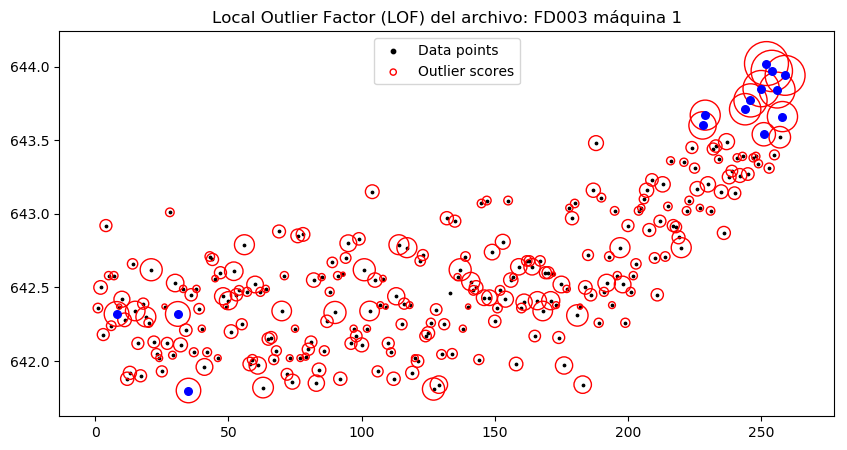

Posibles valores outliers del sensor

7 642.32
30 642.32
34 641.8
227 643.6
228 643.67
243 643.71
245 643.77
249 643.85
250 643.54
251 644.02
253 643.97
255 643.84
257 643.66
258 643.94


Score de los posibles outliers 

-1.3484044518069678
-1.3484044518069678
-1.3413683484752044
-1.4423737351124886
-1.5490386173402906
-1.6066510994904624
-1.6871975489497557
-1.8356545592829676
-1.3022412107961978
-2.260310658607914
-2.1084011596625034
-1.8149396276085932
-1.5558868820273455
-2.025541432965006


[7, 30, 34, 227, 228, 243, 245, 249, 250, 251, 253, 255, 257, 258]

In [27]:
outliers_lof(df_train3_clean, 'FD003', 1, 'sensorMeasure2')

In [28]:
#Limpia el archivo FD003 de prueba

df_test3_clean = sin_outliers(df_test3_clean, 100)

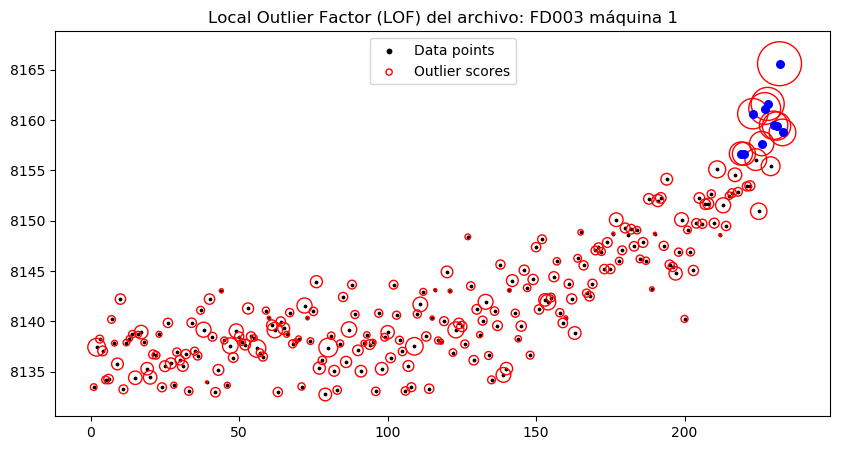

Posibles valores outliers del sensor

218 8156.67
219 8156.65
222 8160.63
225 8157.66
226 8161.14
227 8161.6
229 8159.48
230 8159.4
231 8165.59
232 8158.77


Score de los posibles outliers 

-1.3400158936960367
-1.3372639878068446
-1.6194724510828518
-1.3788005922488689
-1.6844920735744349
-1.743137223272705
-1.5360547226111323
-1.5281125948150633
-2.3498049053997856
-1.4655683384210472


[218, 219, 222, 225, 226, 227, 229, 230, 231, 232]

In [29]:
outliers_lof(df_test3_clean, 'FD003', 1, 'sensorMeasure14')

# 2.2: Normalización (normalize the data)

In [30]:
def normalizacion(datos):
    """
    Esta función normalizado los datos para el archivo especificado.
    input: datos: Datos a normalizar
           
    output: datos: dataset normalizado.
    
    """ 

    datos_1 = datos.copy()

    # Haciendo la normalización zscore a la data de entrenamiento.

    zscore_scaler = preprocessing.StandardScaler()
    columnas_norm = datos_1.columns.difference(['unitNumber', 'opset_id', 'cycle', 'rul', 'rul_norm'])

    normalizado = zscore_scaler.fit_transform(datos_1[columnas_norm])
    normalizado = pd.DataFrame(normalizado, columns= columnas_norm, index= datos_1.index)

    # Juntando las columnas normalizadas con las no-normalizadas.

    join_df = datos_1[datos_1.columns.difference(columnas_norm)].join(normalizado)
    datos_1 = join_df.reindex(columns = datos_1.columns)

    return datos_1

### Entrenamiento

In [31]:
# Se normalizan los dataset 1 y 3
df_train1_norm = normalizacion(df_train1_clean)
df_train3_norm = normalizacion(df_train3_clean)

# Se normalizan los dataset 2 y 4
df_train2_norm = normalizacion(df_train2_clean)
df_train4_norm = normalizacion(df_train4_clean)

In [32]:
df_train1_norm.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm
0,1.0,1.0,0,0.0,-1.841380,-0.174881,-0.978417,-1.0,0.108606,1.180037,...,-0.271311,-0.657565,-1.0,-0.847263,0.0,0.0,1.437403,1.267169,191.0,0.005208
1,1.0,2.0,1,0.0,-1.149998,0.188062,-0.688356,-1.0,0.108606,0.471929,...,-0.645752,-0.317332,-1.0,-0.847263,0.0,0.0,1.091890,1.311181,190.0,0.010417
2,1.0,3.0,2,0.0,-0.730978,-0.467632,-0.567306,-1.0,0.108606,1.063953,...,-0.554374,-0.704589,-1.0,-0.847263,0.0,0.0,0.803963,0.551497,189.0,0.015625
3,1.0,4.0,3,0.0,-0.730978,-1.357869,-0.833386,-1.0,0.108606,1.284512,...,-0.522864,-0.544154,-1.0,-0.847263,0.0,0.0,0.400866,0.835661,188.0,0.020833
4,1.0,5.0,4,0.0,-0.689076,-1.347597,-0.336628,-1.0,0.108606,0.762137,...,-0.524439,-0.383719,-1.0,-0.168673,0.0,0.0,0.516036,1.127479,187.0,0.026042


### Prueba

In [33]:
# Se normalizan los dataset 1 y 3
df_test1_norm = normalizacion(df_test1_clean)
df_test3_norm = normalizacion(df_test3_clean)

# Se normalizan los dataset 2 y 4
df_test2_norm = normalizacion(df_test2_clean)
df_test4_norm = normalizacion(df_test4_clean)

In [34]:
df_test1_norm.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm
0,1.0,1.0,649.0,0.0,1.360364,-0.561570,-0.975963,-1.0,0.175502,0.208720,...,-1.315395,-0.711751,-1.0,-0.462748,0.0,0.0,-0.229966,0.449751,142.0,0.006993
1,1.0,2.0,590.0,0.0,-1.908688,0.070163,-1.393351,-1.0,0.175502,1.602911,...,0.066134,-1.570360,-1.0,0.348179,0.0,0.0,0.899592,0.665079,141.0,0.013986
2,1.0,3.0,45.0,0.0,-0.037093,-0.231709,-0.507711,-1.0,0.175502,0.516910,...,-0.868632,0.629609,-1.0,0.348179,0.0,0.0,1.323176,0.962492,140.0,0.020979
3,1.0,4.0,397.0,0.0,-0.087003,-0.795471,0.252264,-1.0,0.175502,0.458207,...,-0.593701,-1.177262,-1.0,-1.273674,0.0,0.0,0.758397,0.452130,139.0,0.027972
4,1.0,5.0,247.0,0.0,0.087679,-0.181730,-0.420942,-1.0,0.175502,0.590288,...,-0.923618,-0.784164,-1.0,-2.084601,0.0,0.0,0.687800,0.919665,138.0,0.034965


# 2.3: Agrupamiento de los datos (clustering)

In [35]:
from collections import Counter

#Aplico el algoritmo de clustering DBSCAN.

def dbscan(data, eps, min_samples):

    """
    Esta función normalizado los datos para el archivo especificado.
    input: data: Datos a normalizar
           eps: distancia mínima entre puntos (parámetro del dbscan)
           min_samples: puntos mínimos entre grupos (parámetro del dbscan)
           
    output: datos: dataset etiquetado.
    
    """ 
    
    a = data.drop(['unitNumber', 'cycle','rul', 'rul_norm', 'opset_id'], axis = 1)
    X = np.array(a)
    fit = DBSCAN(eps, min_samples, n_jobs=-1).fit(X)
    print(fit)
    print('\n')

    fitted_labels = fit.labels_ #Almaceno las etiquetas de los clusters en la variable fitted_labels.
    n_cluster = len(set(fitted_labels)) #Calculo el # de cluster.

    outliers_df = pd.DataFrame(a) #Creo un DF con solo los sensores para almacenar los outliers.
    outliers_df = outliers_df.loc[:, outliers_df.std() > 0.00001] #Remuevo las columnas con desviación estándar igual a cero.

    print(Counter(fitted_labels)) #Cuento cuantos elementos tiene cada cluster.
    print('\n')

    print('El número de cluster estimados es: %d ' % n_cluster)

    print('\n')
    print('Estos son los outliers detectados por el algoritmo DBSCAN:')
    print('\n')
    print(outliers_df[fitted_labels == -1]) #Imprimo SOLO los outliers del DBSCAN.
    
    etiqueta = pd.DataFrame(outliers_df[fitted_labels == -1])
    
    return etiqueta

In [36]:
etiqueta = dbscan(df_train1_norm, 2, 1000)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1000, n_jobs=-1, p=None)


Counter({0: 16164, -1: 4467})


El número de cluster estimados es: 2 


Estos son los outliers detectados por el algoritmo DBSCAN:


       sensorMeasure2  sensorMeasure3  sensorMeasure4  sensorMeasure6  \
159          1.573630       -0.012241        1.017754        0.108606   
161          0.945100        0.256542        1.634420        0.108606   
162          0.316571        1.680922        1.361488        0.108606   
163          0.987002        1.410427        0.867013        0.108606   
164          0.128012        1.080012       -0.123078        0.108606   
165          1.343169        1.026940        1.507661        0.108606   
168          1.049855       -0.096129        1.014328        0.108606   
169          0.463228        0.340430        0.941242        0.108606   
170          1.175561        0.229150        0.664884        0.108606   
171     

Al observar el resultado obtenido por el DBSCAN, observamos que existen **dos grupos**, *el grupo 0 y el grupo -1*. Esto nos ayudará a etiquetar los datos. **Todos aquellos datos que esten en el grupo 0 se etiquetaran como 0 y los que esten dentro del grupo -1 se etiquetaran como 1.**

**Un punto muy relevante que es necesario mencionar es que los valores que entran dentro del grupo -1 aparecen, en promedio, dentro de los últimos 30 ciclos de la máquina antes de la falla.** Concretamente, se puede inferir que aquellos puntos etiquetados como 0 son valores "normales" y los etiquetados como 1 son valores "degradados".

### **Se tomará 30 como el valor del rango antes de que falle la máquina para etiquetar los datos.**

# 2.4: Etiquetado de los datos

In [37]:
def etiquetado(datos, periodo):

    """
    Esta función etiqueta los datos.
    input: datos: Datos a etiquetar
           
    output: datos: dataset normalizado.
    
    """ 
    #Creando las etiquetas de la clasificación binaria en una columna adicional.
    datos['label'] = datos['rul'].apply(lambda x: 1 if x <= periodo else 0)
    
    return datos

In [38]:
df_train1_norm = etiquetado(df_train1_norm, 30)
df_train3_norm = etiquetado(df_train3_norm, 30)
df_train2_norm = etiquetado(df_train2_norm, 30)
df_train4_norm = etiquetado(df_train4_norm, 30)

In [39]:
df_train1_norm.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm,label
0,1.0,1.0,0,0.0,-1.841380,-0.174881,-0.978417,-1.0,0.108606,1.180037,...,-0.657565,-1.0,-0.847263,0.0,0.0,1.437403,1.267169,191.0,0.005208,0
1,1.0,2.0,1,0.0,-1.149998,0.188062,-0.688356,-1.0,0.108606,0.471929,...,-0.317332,-1.0,-0.847263,0.0,0.0,1.091890,1.311181,190.0,0.010417,0
2,1.0,3.0,2,0.0,-0.730978,-0.467632,-0.567306,-1.0,0.108606,1.063953,...,-0.704589,-1.0,-0.847263,0.0,0.0,0.803963,0.551497,189.0,0.015625,0
3,1.0,4.0,3,0.0,-0.730978,-1.357869,-0.833386,-1.0,0.108606,1.284512,...,-0.544154,-1.0,-0.847263,0.0,0.0,0.400866,0.835661,188.0,0.020833,0
4,1.0,5.0,4,0.0,-0.689076,-1.347597,-0.336628,-1.0,0.108606,0.762137,...,-0.383719,-1.0,-0.168673,0.0,0.0,0.516036,1.127479,187.0,0.026042,0


In [40]:
def conteo(datos, archivo):
    
    """
    Esta función cuenta el número de muestras negativas (cluster 0) y el número de muestras positivas (cluster 1)
    
    input: datos: Datos a contar.
           Archivo: Archivo a contar.
           
    output: cantidad de muestras por archivo.
    
    """
    
    print('\nCantidad de valores etiquetados como cero (0) para el archivo ' +archivo+': {}'
          .format(datos['label'].value_counts()[0]))

    print('\nCantidad de valores etiquetados como uno (1) para el archivo ' +archivo+': {}'
          .format(datos['label'].value_counts()[1]))

    print('\nMuestras negativas =  {0:.0%}'
          .format(datos['label'].value_counts()[0]/datos['label'].count()))

    print('\nMuestras positivas =  {0:.0%}'
          .format(datos['label'].value_counts()[1]/datos['label'].count()))

### Datos de entrenamiento

In [41]:
conteo(df_train1_norm, 'FD001')


Cantidad de valores etiquetados como cero (0) para el archivo FD001: 17531

Cantidad de valores etiquetados como uno (1) para el archivo FD001: 3100

Muestras negativas =  85%

Muestras positivas =  15%


In [42]:
conteo(df_train3_norm, 'FD003')


Cantidad de valores etiquetados como cero (0) para el archivo FD003: 21620

Cantidad de valores etiquetados como uno (1) para el archivo FD003: 3100

Muestras negativas =  87%

Muestras positivas =  13%


In [43]:
conteo(df_train2_norm, 'FD002')


Cantidad de valores etiquetados como cero (0) para el archivo FD002: 45699

Cantidad de valores etiquetados como uno (1) para el archivo FD002: 8060

Muestras negativas =  85%

Muestras positivas =  15%


In [44]:
conteo(df_train4_norm, 'FD004')


Cantidad de valores etiquetados como cero (0) para el archivo FD004: 53530

Cantidad de valores etiquetados como uno (1) para el archivo FD004: 7719

Muestras negativas =  87%

Muestras positivas =  13%


In [45]:
df_train1_norm.to_csv('df_train1_norm.csv')
df_train3_norm.to_csv('df_train3_norm.csv')
df_train2_norm.to_csv('df_train2_norm.csv')
df_train4_norm.to_csv('df_train4_norm.csv')

### Datos de prueba

#### Para Regresión y Clasificación

In [46]:
def preparar_test_data(df_test_norm, df_rul, periodo):
    
    """
    Esta función prepara el set de prueba para las secciones de Clasificación y Regresión.
    
    input: df_test_norm: Datos de prueba normalizados.
           df_rul: Datos RUL.
           periodo: Número de periodos para etiquetar la data
           
    output: Archivo Test listo para clasificación y regresión
    
    """
    
    df_test_last_cycle = pd.DataFrame(df_test_norm.groupby('unitNumber')['cycle'].max())
    
    df_test_last_cycle.reset_index(level=0, inplace=True)
    df_test_last_cycle.columns = ['unitNumber', 'last_cycle']
    
    df_test_norm = pd.merge(df_test_norm, df_test_last_cycle, on='unitNumber')

    df_test_norm = df_test_norm[df_test_norm['cycle'] == df_test_norm['last_cycle']]

    df_test_norm.drop(['last_cycle'], axis=1, inplace=True)
    
    df_test_norm.reset_index(drop=True, inplace=True)
       
    df_test_norm = pd.concat([df_test_norm, df_rul], axis=1).drop(['rul', 'rul_norm'], axis=1)
    
    # Creando etiqueta de clasificación binaria
    df_test_norm['label'] = df_test_norm['RUL'].apply(lambda x: 1 if x <= periodo else 0)

    return df_test_norm

In [47]:
df_test1_norm_rc = prepare_test_data(df_test1_norm, RUL_fd001, 30)
df_test3_norm_rc = prepare_test_data(df_test3_norm, RUL_fd003, 30)
df_test2_norm_rc = prepare_test_data(df_test2_norm, RUL_fd002, 30)
df_test4_norm_rc = prepare_test_data(df_test4_norm, RUL_fd004, 30)

In [48]:
df_test1_norm_rc.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,RUL,label
0,1.0,31.0,372.0,0.0,0.262362,-1.375226,-0.871242,-1.0,0.175502,0.971856,...,-0.867650,-0.808301,-1.0,0.348179,0.0,0.0,-0.582953,0.232044,112,0
1,2.0,49.0,50.0,0.0,0.187498,-0.301680,0.912006,-1.0,0.175502,-0.348956,...,-1.182839,0.850296,-1.0,-1.273674,0.0,0.0,-0.582953,-0.879094,98,0
2,3.0,126.0,831.0,0.0,1.010999,0.330053,2.117793,-1.0,0.175502,-1.713795,...,-0.735094,-0.480720,-1.0,1.970032,0.0,0.0,0.264215,-0.733956,69,0
3,4.0,106.0,268.0,0.0,0.761453,1.285650,0.321081,-1.0,0.175502,-1.640417,...,-0.521040,1.295117,-1.0,1.970032,0.0,0.0,-2.206692,-0.923112,82,0
4,5.0,98.0,392.0,0.0,-0.511231,0.368037,2.188106,-1.0,0.175502,-0.686497,...,-1.296739,0.357199,-1.0,1.159106,0.0,0.0,-1.006537,0.904199,91,0


In [49]:
df_test3_norm_rc.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,RUL,label
0,1.0,233.0,309.0,0.0,0.787529,1.281667,1.325965,-1.0,-0.863395,2.681084,...,2.064139,-2.419622,-1.0,0.814411,0.0,0.0,2.548150,1.645978,44,0
1,2.0,124.0,65.0,0.0,0.711650,0.320403,1.299871,-1.0,0.954321,-0.554407,...,-1.055068,1.394056,-1.0,0.055415,0.0,0.0,-0.983857,-1.149146,51,0
2,3.0,234.0,830.0,0.0,1.192216,1.190945,2.455250,-1.0,0.348416,4.065156,...,3.565378,-2.195433,-1.0,2.332403,0.0,0.0,1.606282,2.390236,27,1
3,4.0,68.0,124.0,0.0,0.003447,-0.208485,0.846127,-1.0,0.954321,-0.815044,...,-0.472437,0.957996,-1.0,0.055415,0.0,0.0,-1.749126,-0.187772,120,0
4,5.0,138.0,712.0,0.0,-0.325362,-0.997957,-0.502057,-1.0,-0.863395,-0.334214,...,-0.601346,-0.118605,-1.0,-1.462577,0.0,0.0,-0.630657,0.456730,101,0


In [50]:
df_test2_norm_rc.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,RUL,label
0,1.0,258.0,11452.0,0.609351,0.691736,0.909984,1.024747,0.684641,0.713939,0.754357,...,1.233734,-0.761926,1.477691,0.830763,0.619517,0.417335,0.752973,0.772056,18,1
1,2.0,55.0,792.0,1.729018,1.689369,1.633439,1.806852,1.816057,1.835699,1.845116,...,0.888502,-1.191033,1.477691,1.623297,1.094614,0.417335,1.814672,1.823937,79,0
2,3.0,165.0,5073.0,-0.887948,-0.635585,-0.452379,-0.567018,-0.706173,-0.663018,-0.604143,...,0.090557,-0.007777,-0.676731,-0.574184,-0.041487,0.417335,-0.614521,-0.596353,106,0
3,4.0,86.0,3152.0,0.690245,0.760566,0.654647,0.457027,0.361773,0.376125,0.350289,...,-0.014897,-0.107430,-0.676731,0.614617,0.653945,0.417335,0.341211,0.366302,110,0
4,5.0,148.0,1926.0,-1.055785,-0.770834,-0.562497,-0.527115,-1.139422,-1.081612,-0.987526,...,0.922143,0.108595,-0.676731,-0.538160,-0.117227,0.417335,-1.059587,-1.033531,15,1


In [51]:
df_test4_norm_rc.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,RUL,label
0,1.0,230.0,8249.0,-0.386443,-1.115274,-1.428941,-1.276690,-0.264667,-0.472212,-0.722681,...,-2.055219,1.984118,-0.659188,-1.411953,-2.164472,-2.397634,-0.646597,-0.648839,22,1
1,2.0,153.0,2617.0,-1.052828,-0.783999,-0.577694,-0.539496,-1.136389,-1.076586,-0.980042,...,0.121642,0.144877,-0.659188,-0.578757,-0.114315,0.417078,-1.034234,-1.019984,39,0
2,3.0,141.0,8407.0,-1.052828,-0.797196,-0.700914,-0.663433,-1.136389,-1.082131,-0.978464,...,0.384819,0.017111,-0.659188,-0.614983,-0.114315,0.417078,-1.031198,-1.034101,107,0
3,4.0,208.0,4676.0,-0.386443,-1.158367,-1.531576,-1.343354,-0.264667,-0.470364,-0.729059,...,-2.194059,2.089045,-0.659188,-1.484405,-2.164472,-2.397634,-0.646597,-0.659516,75,0
4,5.0,51.0,1488.0,-0.386443,-1.123354,-1.435676,-1.225000,-0.264667,-0.464819,-0.729744,...,-2.252068,2.182821,-0.659188,-1.448179,-2.164472,-2.397634,-0.668863,-0.650206,149,0


In [52]:
df_test1_norm_rc.to_csv('df_test1_rc.csv')
df_test3_norm_rc.to_csv('df_test3_rc.csv')
df_test2_norm_rc.to_csv('df_test2_rc.csv')
df_test4_norm_rc.to_csv('df_test4_rc.csv')

### Para red neuronal

In [53]:
df_test1_norm.to_csv('df_test1_norm.csv')
df_test3_norm.to_csv('df_test3_norm.csv')
df_test2_norm.to_csv('df_test2_norm.csv')
df_test4_norm.to_csv('df_test4_norm.csv')